In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from prophet import Prophet
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
import warnings
import tqdm as tqdm

c:\Users\Jonbi\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

# Data Gathering

In [4]:
# Reading in one of the csv files
df = pd.read_csv('hourly_44201_2012.csv')

C:\Users\Jonbi\AppData\Local\Temp\ipykernel_18292\2036269392.py:2: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('hourly_44201_2012.csv')


In [5]:
# Filtering the dataframe by county and site number
df = df[(df['County Name'] == 'Los Angeles') & (df['Site Num'] == 6012)]


In [6]:
df.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Date Local,...,Units of Measure,MDL,Uncertainty,Qualifier,Method Type,Method Code,Method Name,State Name,County Name,Date of Last Change
1010792,6,37,6012,44201,1,34.38344,-118.5284,WGS84,Ozone,2012-01-01,...,Parts per million,0.005,NaN,NaN,FEM,87,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,California,Los Angeles,2012-06-29
1010793,6,37,6012,44201,1,34.38344,-118.5284,WGS84,Ozone,2012-01-01,...,Parts per million,0.005,NaN,NaN,FEM,87,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,California,Los Angeles,2012-06-29
1010794,6,37,6012,44201,1,34.38344,-118.5284,WGS84,Ozone,2012-01-01,...,Parts per million,0.005,NaN,NaN,FEM,87,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,California,Los Angeles,2012-06-29
1010795,6,37,6012,44201,1,34.38344,-118.5284,WGS84,Ozone,2012-01-01,...,Parts per million,0.005,NaN,NaN,FEM,87,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,California,Los Angeles,2012-06-29
1010796,6,37,6012,44201,1,34.38344,-118.5284,WGS84,Ozone,2012-01-01,...,Parts per million,0.005,NaN,NaN,FEM,87,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,California,Los Angeles,2012-06-29


In [7]:
# Adding the rest of the CSV files to a list
file_list = ['hourly_44201_2012.csv' ,'hourly_44201_2013.csv' , 'hourly_44201_2014.csv' , 'hourly_44201_2015.csv' , 'hourly_44201_2016.csv' , 'hourly_44201_2017.csv', 'hourly_44201_2018.csv', 'hourly_44201_2018.csv',
'hourly_44201_2019.csv', 'hourly_44201_2020.csv', 'hourly_44201_2021.csv', 'hourly_44201_2022.csv']

In [8]:
combined_df = pd.DataFrame() 

In [9]:
# Looping through list of filenamews, filtering them all by county and site number, appending them to a new dataframe
for file in file_list:
    df = pd.read_csv(file)
    
    df = df[(df['County Name'] == 'Los Angeles') & (df['Site Num'] == 6012)]
    combined_df = combined_df.append(df, ignore_index=True)

C:\Users\Jonbi\AppData\Local\Temp\ipykernel_18292\2880273771.py:3: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
C:\Users\Jonbi\AppData\Local\Temp\ipykernel_18292\2880273771.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\Jonbi\AppData\Local\Temp\ipykernel_18292\2880273771.py:3: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
C:\Users\Jonbi\AppData\Local\Temp\ipykernel_18292\2880273771.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\Jonbi\AppData\Local\Temp\ipykernel_18292\2880273771.py:3: DtypeWarning: Columns (17) have

In [10]:
# Replacing original dataframe with filtered data
df = combined_df

# Exploratory Data Analysis

In [11]:
pd.set_option('display.max_columns', None)
df.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Date Local,Time Local,Date GMT,Time GMT,Sample Measurement,Units of Measure,MDL,Uncertainty,Qualifier,Method Type,Method Code,Method Name,State Name,County Name,Date of Last Change
0,6,37,6012,44201,1,34.38344,-118.5284,WGS84,Ozone,2012-01-01,00:00,2012-01-01,08:00,0.010,Parts per million,0.005,NaN,NaN,FEM,87,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,California,Los Angeles,2012-06-29
1,6,37,6012,44201,1,34.38344,-118.5284,WGS84,Ozone,2012-01-01,01:00,2012-01-01,09:00,0.014,Parts per million,0.005,NaN,NaN,FEM,87,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,California,Los Angeles,2012-06-29
2,6,37,6012,44201,1,34.38344,-118.5284,WGS84,Ozone,2012-01-01,02:00,2012-01-01,10:00,0.013,Parts per million,0.005,NaN,NaN,FEM,87,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,California,Los Angeles,2012-06-29
3,6,37,6012,44201,1,34.38344,-118.5284,WGS84,Ozone,2012-01-01,03:00,2012-01-01,11:00,0.013,Parts per million,0.005,NaN,NaN,FEM,87,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,California,Los Angeles,2012-06-29
4,6,37,6012,44201,1,34.38344,-118.5284,WGS84,Ozone,2012-01-01,05:00,2012-01-01,13:00,0.015,Parts per million,0.005,NaN,NaN,FEM,87,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,California,Los Angeles,2012-06-29


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State Code           96294 non-null  int64  
 1   County Code          96294 non-null  int64  
 2   Site Num             96294 non-null  int64  
 3   Parameter Code       96294 non-null  int64  
 4   POC                  96294 non-null  int64  
 5   Latitude             96294 non-null  float64
 6   Longitude            96294 non-null  float64
 7   Datum                96294 non-null  object 
 8   Parameter Name       96294 non-null  object 
 9   Date Local           96294 non-null  object 
 10  Time Local           96294 non-null  object 
 11  Date GMT             96294 non-null  object 
 12  Time GMT             96294 non-null  object 
 13  Sample Measurement   96294 non-null  float64
 14  Units of Measure     96294 non-null  object 
 15  MDL                  96294 non-null 

In [13]:
df.isnull().sum()

State Code                 0
County Code                0
Site Num                   0
Parameter Code             0
POC                        0
Latitude                   0
Longitude                  0
Datum                      0
Parameter Name             0
Date Local                 0
Time Local                 0
Date GMT                   0
Time GMT                   0
Sample Measurement         0
Units of Measure           0
MDL                        0
Uncertainty            96294
Qualifier              96215
Method Type                0
Method Code                0
Method Name                0
State Name                 0
County Name                0
Date of Last Change        0
dtype: int64

# Data Cleaning and Preprocessing

In [14]:
# The prophet model requires a single datetime column, so I'm combining exsiting columns into one
df['DateTime'] = pd.to_datetime(df['Date Local'] + ' ' + df['Time Local'])

In [15]:
# Removing all columns except for datetime and the sample measurement (dependent variable)
df_date_measure = df[['DateTime', 'Sample Measurement']] 

In [16]:
df_date_measure = df_date_measure.set_index('DateTime')

In [17]:
# Confirming the df is formatted correctly
df_date_measure.head()

,Sample Measurement
DateTime,
2012-01-01 00:00:00,0.010
2012-01-01 01:00:00,0.014
2012-01-01 02:00:00,0.013
2012-01-01 03:00:00,0.013
2012-01-01 05:00:00,0.015


# Data Visualizations

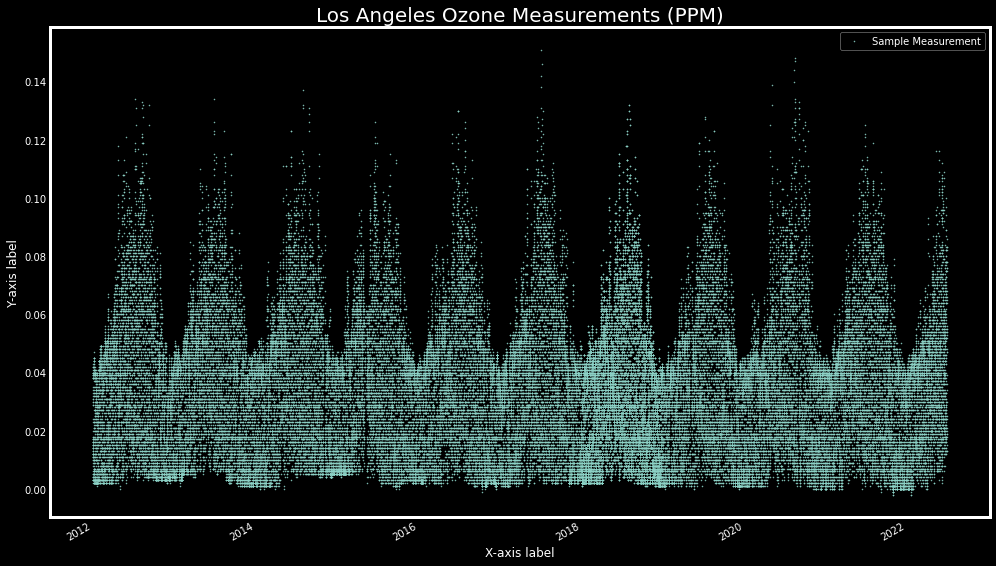

In [37]:
import matplotlib.pyplot as plt

# Set the background color to black
plt.style.use('dark_background')

# Plotting all measurements
color_pal = sns.color_palette()
df_date_measure.plot(style='.',
                     figsize=(15, 10),
                     ms=1,
                     color=color_pal[0],
                     grid=False)  # Add grid=False to remove horizontal lines

plt.title('Los Angeles Ozone Measurements (PPM)', fontsize=20, color='white') 
plt.xlabel('X-axis label', color='white')
plt.ylabel('Y-axis label', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

In [20]:
# Creating new columns from the datetime column for more granular analaysis

from pandas.api.types import CategoricalDtype

cat_type = CategoricalDtype(categories=['Monday','Tuesday',
                                        'Wednesday',
                                        'Thursday','Friday',
                                        'Saturday','Sunday'],
                            ordered=True)

def create_features(df_date_measure, label=None):
    """
    Creates time series features from datetime index.
    """
    df_date_measure = df_date_measure.copy()
    df_date_measure['date'] = df_date_measure.index
    df_date_measure['hour'] = df_date_measure['date'].dt.hour
    df_date_measure['dayofweek'] = df_date_measure['date'].dt.dayofweek
    df_date_measure['weekday'] = df_date_measure['date'].dt.day_name()
    df_date_measure['weekday'] = df_date_measure['weekday'].astype(cat_type)
    df_date_measure['quarter'] = df_date_measure['date'].dt.quarter
    df_date_measure['month'] = df_date_measure['date'].dt.month
    df_date_measure['year'] = df_date_measure['date'].dt.year
    df_date_measure['dayofyear'] = df_date_measure['date'].dt.dayofyear
    df_date_measure['dayofmonth'] = df_date_measure['date'].dt.day
    df_date_measure['weekofyear'] = df_date_measure['date'].dt.weekofyear
    df_date_measure['date_offset'] = (df_date_measure.date.dt.month*100 + df_date_measure.date.dt.day - 320)%1300

    df_date_measure['season'] = pd.cut(df_date_measure['date_offset'], [0, 300, 602, 900, 1300], 
                          labels=['Spring', 'Summer', 'Fall', 'Winter']
                   )
    X = df_date_measure[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear','weekday',
           'season']]
    if label:
        y = df_date_measure[label]
        return X, y
    return X

X, y = create_features(df_date_measure, label='Sample Measurement')
features_and_target = pd.concat([X, y], axis=1)

C:\Users\Jonbi\AppData\Local\Temp\ipykernel_18292\239357953.py:26: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_date_measure['weekofyear'] = df_date_measure['date'].dt.weekofyear


In [21]:
features_and_target.head()

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,weekday,season,Sample Measurement
DateTime,,,,,,,,,,,
2012-01-01 00:00:00,0,6,1,1,2012,1,1,52,Sunday,Winter,0.010
2012-01-01 01:00:00,1,6,1,1,2012,1,1,52,Sunday,Winter,0.014
2012-01-01 02:00:00,2,6,1,1,2012,1,1,52,Sunday,Winter,0.013
2012-01-01 03:00:00,3,6,1,1,2012,1,1,52,Sunday,Winter,0.013
2012-01-01 05:00:00,5,6,1,1,2012,1,1,52,Sunday,Winter,0.015


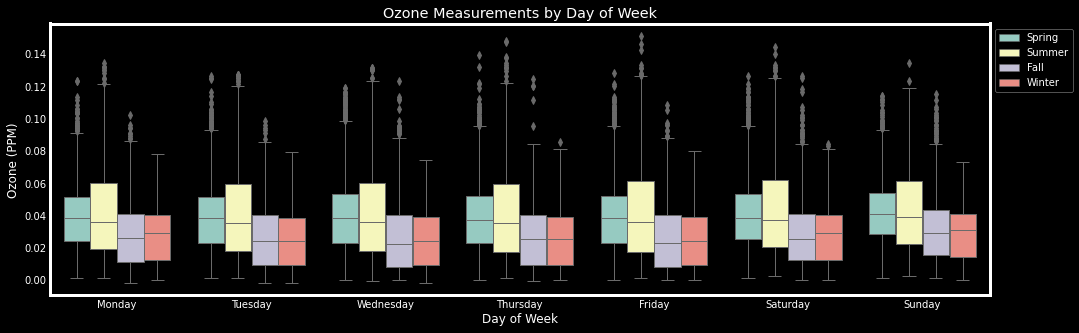

In [39]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.boxplot(data=features_and_target.dropna(),
            x='weekday',
            y='Sample Measurement',
            hue='season',
            ax=ax,
            linewidth=1)

ax.set_title('Ozone Measurements by Day of Week', color='white')  
ax.set_xlabel('Day of Week', color='white')
ax.set_ylabel('Ozone (PPM)', color='white')
ax.legend(bbox_to_anchor=(1, 1))
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.grid(False)  # Remove the gridlines
plt.show()

# Creating the Model

In [23]:
# Splitting 20% of the data out for training/testing
split_date = '1-Jan-2020'
df_date_measure_train = df_date_measure.loc[df_date_measure.index <= split_date].copy()
df_date_measure_test = df_date_measure.loc[df_date_measure.index > split_date].copy()

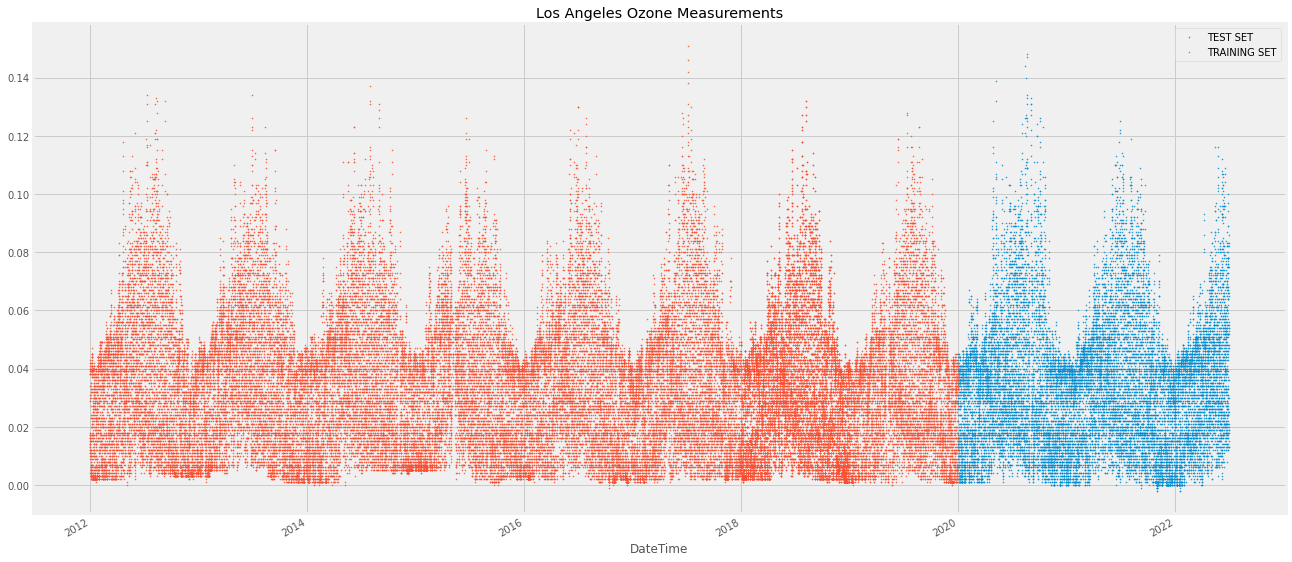

In [24]:
# Plotting train and test data to visualize the split
df_date_measure_test \
    .rename(columns={'Sample Measurement': 'TEST SET'}) \
    .join(df_date_measure_train.rename(columns={'Sample Measurement': 'TRAINING SET'}),
          how='outer') \
    .plot(figsize=(20, 10), title='Los Angeles Ozone Measurements', style='.', ms=1)
plt.show()

In [25]:
#df_date_measure.plot.bar(figsize=(20, 10), title='Los Angeles Ozone Measurements')

plt.show()

In [26]:
# Format data for prophet model using ds and y
df_date_measure_train_prophet = df_date_measure_train.reset_index() \
    .rename(columns={'DateTime':'ds',
                     'Sample Measurement':'y'})

In [27]:
# Training the model
model = Prophet()
model.fit(df_date_measure_train_prophet)

17:03:49 - cmdstanpy - INFO - Chain [1] start processing
17:04:45 - cmdstanpy - INFO - Chain [1] done processing


In [28]:
# Predict on test set with model
df_date_measure_test_prophet = df_date_measure_test.reset_index() \
    .rename(columns={'DateTime':'ds',
                     'Sample Measurement':'y'})

df_date_measure_test_fcst = model.predict(df_date_measure_test_prophet)

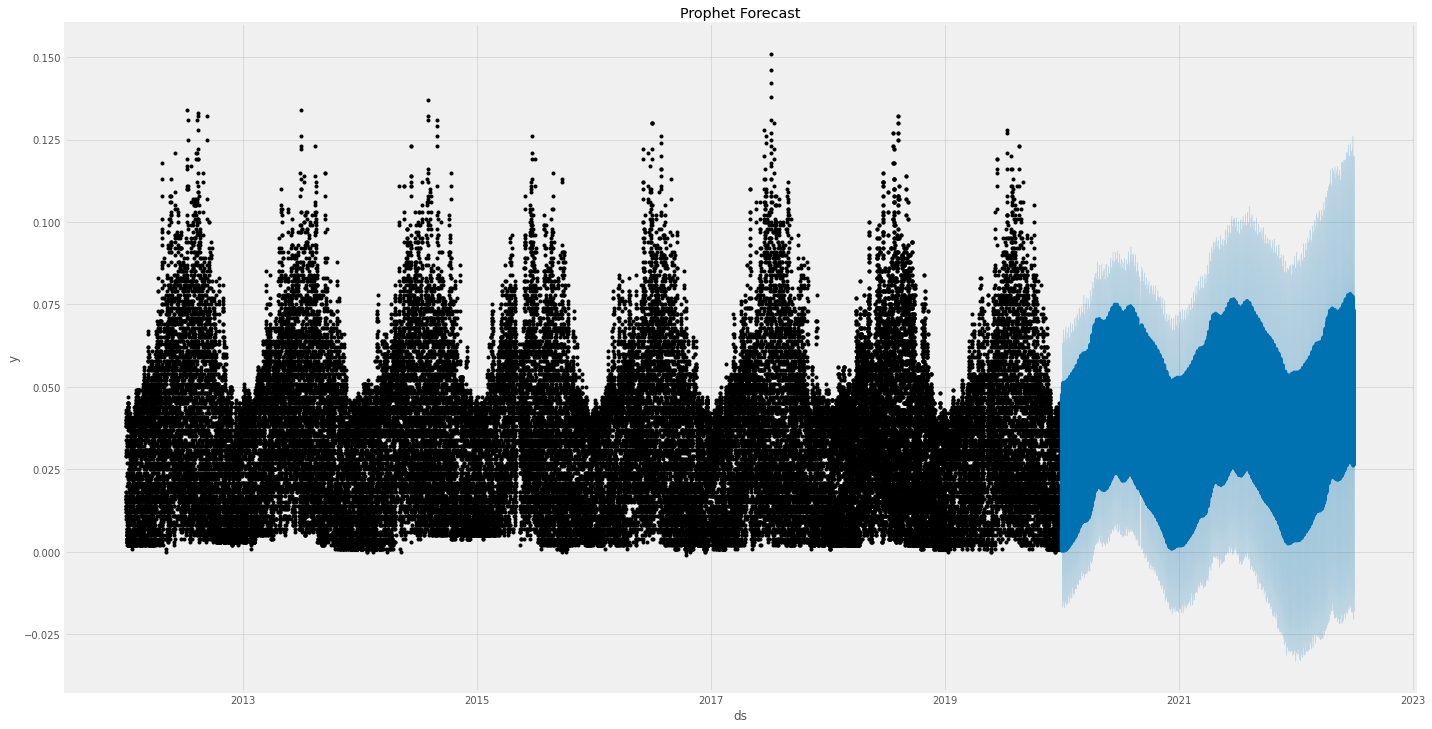

In [29]:
# Visualizing the model's forecast 

fig, ax = plt.subplots(figsize=(20, 10))
fig = model.plot(df_date_measure_test_fcst, ax=ax)
ax.set_title('Prophet Forecast')
plt.show()

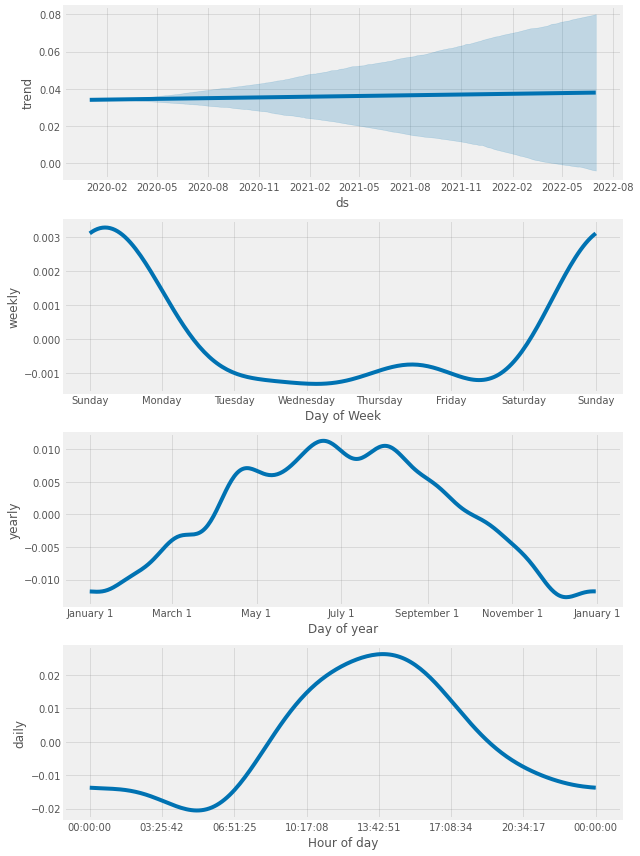

In [30]:
# Plotting the model's forcast over different timeframes
fig = model.plot_components(df_date_measure_test_fcst)
plt.show()

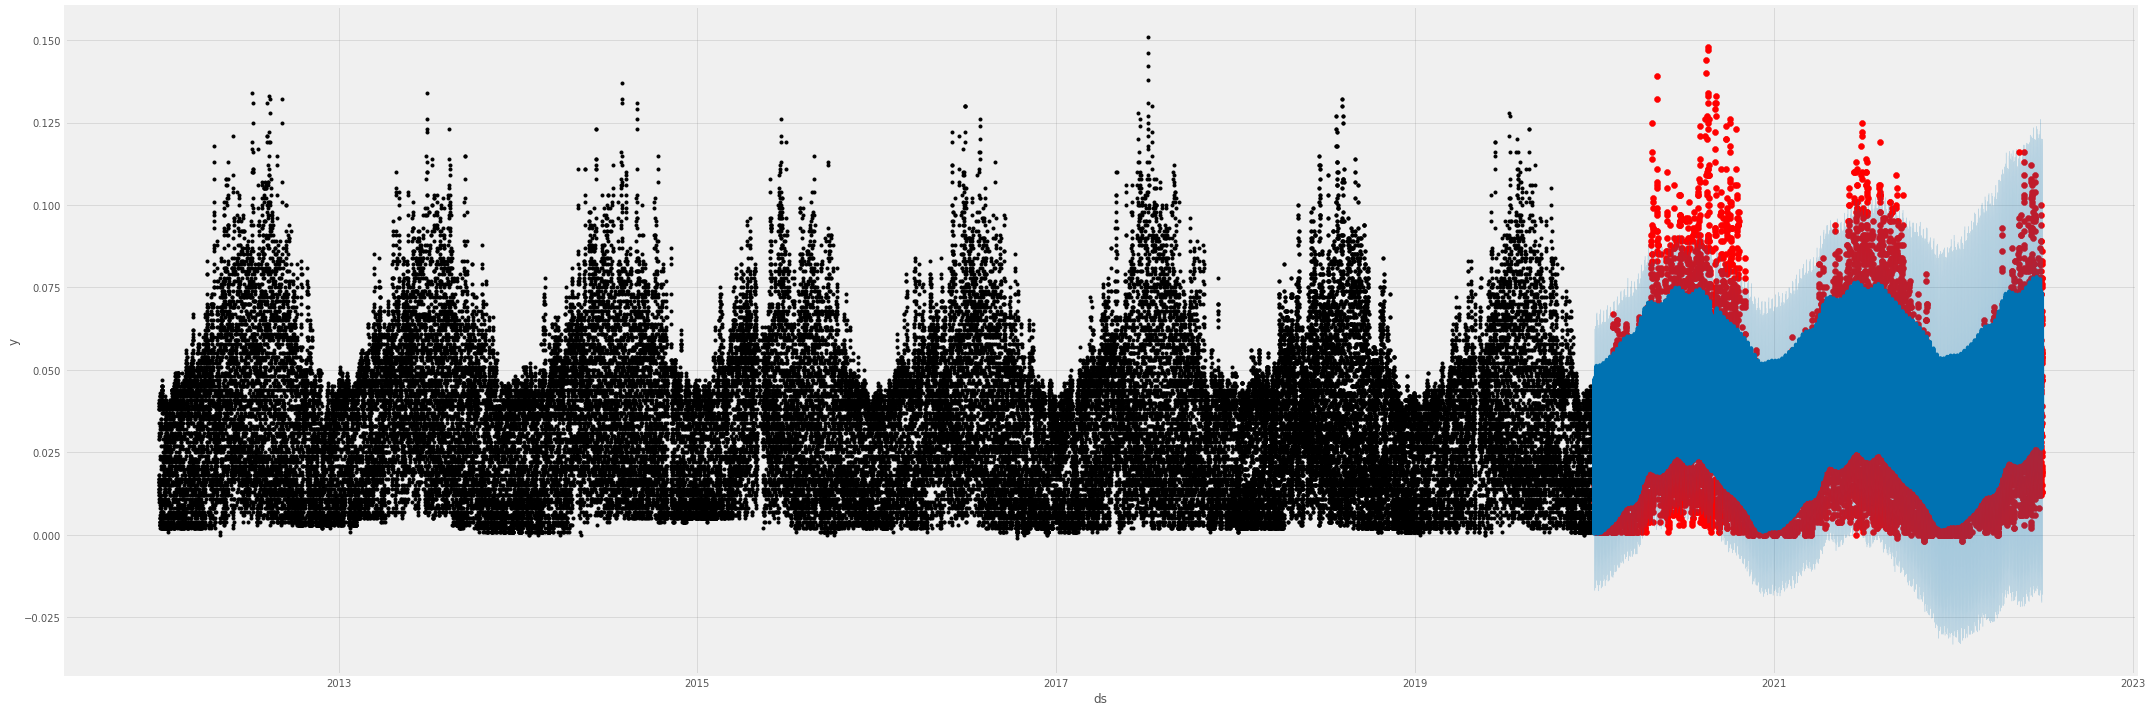

In [31]:
# Plot the forecast against the actual data
f, ax = plt.subplots(figsize=(30, 10))
ax.scatter(df_date_measure_test.index, df_date_measure_test['Sample Measurement'], color='r')
fig = model.plot(df_date_measure_test_fcst, ax=ax)

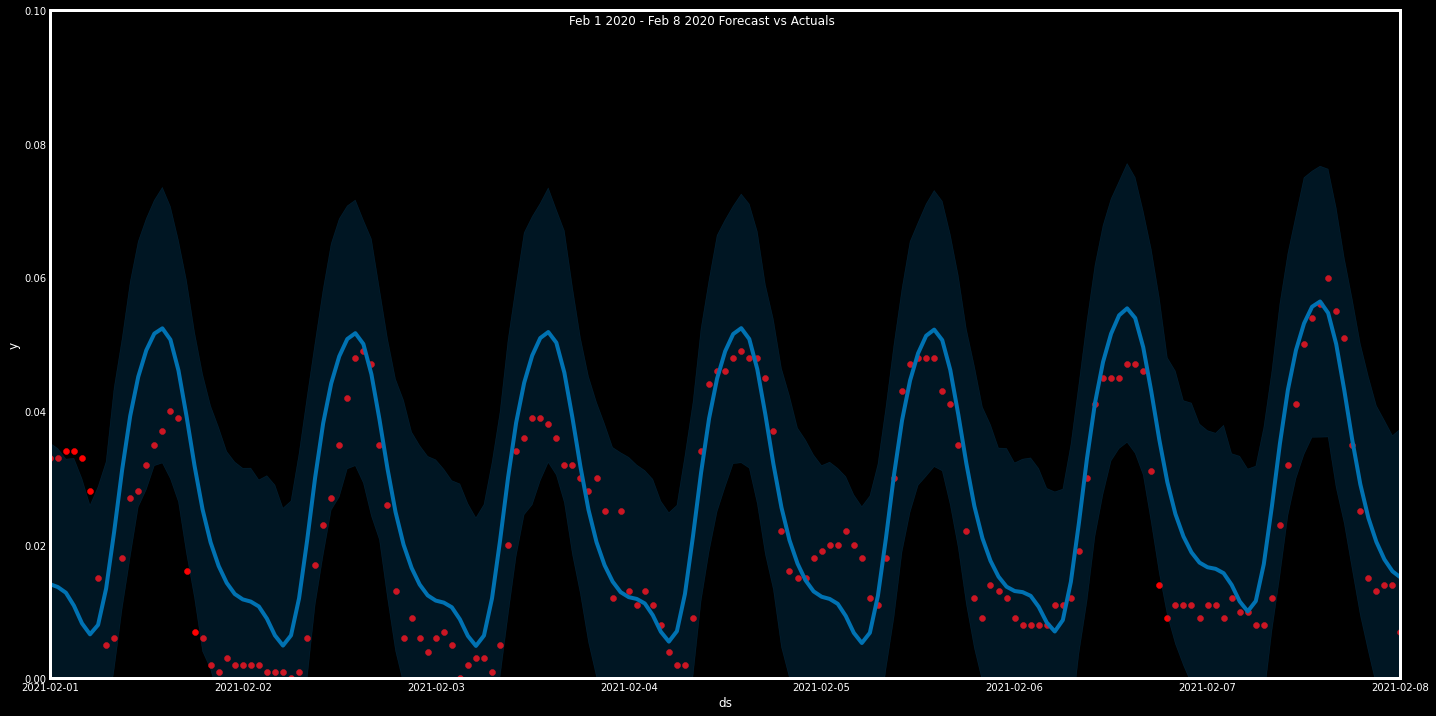

In [42]:
import datetime

fig, ax = plt.subplots(figsize=(20, 10))

ax.scatter(df_date_measure_test.index, df_date_measure_test['Sample Measurement'], color='r')
fig = model.plot(df_date_measure_test_fcst, ax=ax)

lower_bound = datetime.datetime.strptime('02-01-2021', '%m-%d-%Y')
upper_bound = datetime.datetime.strptime('02-08-2021', '%m-%d-%Y')

ax.set_xbound(lower=lower_bound, upper=upper_bound)
ax.set_ylim(0, 0.10)

# Set the title color to white
plot = plt.suptitle('Feb 1 2020 - Feb 8 2020 Forecast vs Actuals', color='white')

# Set the tick labels color to white
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Set the spines color to white
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

ax.grid(False)  # Remove the gridlines

plt.show()


# Evaluating Model Performance

In [33]:
# Calculating Mean Squared Error
np.sqrt(mean_squared_error(y_true=df_date_measure_test['Sample Measurement'], y_pred=df_date_measure_test_fcst['yhat']))

0.012841843293352301

In [34]:
# Calculating Mean Absolute Error
mean_absolute_error(y_true=df_date_measure_test['Sample Measurement'], y_pred=df_date_measure_test_fcst['yhat'])

0.010136143894615741